<a href="https://colab.research.google.com/github/jannat99/ML/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
from google.colab import drive
import pandas as pd
import io
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
import numpy as np
import itertools

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Import Dataset**

In [ ]:
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/dataset/fake_news_classifier.csv")
dataset

Mounted at /content/drive


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


# **Reset Index After Dropping Nun Values**

In [ ]:
dataset=dataset.dropna()
dataset.shape
solid_dataset=dataset.copy()
solid_dataset.reset_index(inplace=True)
solid_dataset

,index,URLs,Headline,Body,Label
0,0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...,...
3983,4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
3984,4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
3985,4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
3986,4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


# **Clean Data**

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(solid_dataset)):
    review = re.sub('[^a-zA-Z]', ' ', solid_dataset['Body'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus[3]

'mexico citi reuter egypt cheiron hold limit right partner mexican nation oil compani pemex onshor cardena mora project industri regul said wednesday tie mark second joint ventur pemex equiti partner sinc energi open final end compani decad long monopoli allow develop project privat foreign oil compani cardena mora squar mile sq km field locat tabasco state believ contain million barrel oil equival boe proven probabl possibl reserv'

# **Feature Extraction-Tfidf**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()
y=solid_dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tfidf.get_feature_names()[:20]
tfidf.get_params()
count_dataset = pd.DataFrame(X_train, columns=tfidf.get_feature_names())
count_dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,...,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.022829,0.031213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.01838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.024859,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2787,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2788,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2789,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model 1 : Naive Bayes Classifier**

In [ ]:
model1=MultinomialNB()

# **Model 2 : K-Nearest Neighbor**

In [ ]:
model2 = KNeighborsClassifier()

# **Model 3 : Support Vector Machine**

In [ ]:
model3 = svm.SVC() 

# **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Confusion Matrix for Model-1**

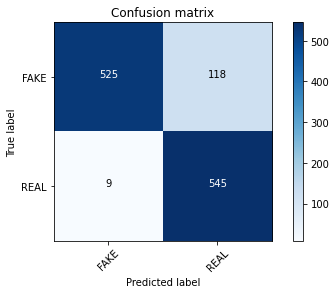

In [ ]:
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# **Confusion Matrix for Model-2**

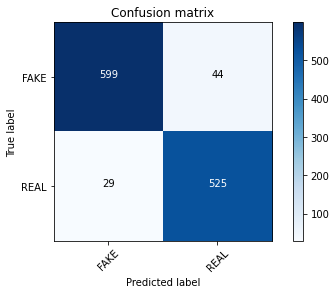

In [ ]:
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# **Confusion Matrix for Model-3**

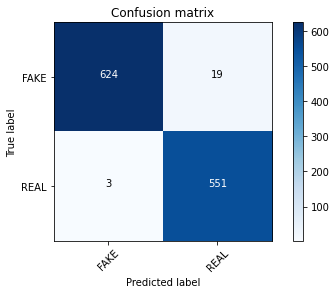

In [ ]:
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# **Comparison of Accuracy, Precision, Recall and F1-score for 3 Models**

In [ ]:
acc1 = metrics.accuracy_score(y_test, pred1)
prec1 = metrics.precision_score(y_test, pred1)
rec1 = metrics.recall_score(y_test, pred1)
f1score1 = metrics.f1_score(y_test, pred1)

acc2 = metrics.accuracy_score(y_test, pred2)
prec2 = metrics.precision_score(y_test, pred2)
rec2 = metrics.recall_score(y_test, pred2)
f1score2 = metrics.f1_score(y_test, pred2)

acc3 = metrics.accuracy_score(y_test, pred3)
prec3 = metrics.precision_score(y_test, pred3)
rec3 = metrics.recall_score(y_test, pred3)
f1score3 = metrics.f1_score(y_test, pred3)

print(f'\t\t\t\tAccuracy | Precision | Recall | F1score')
print(f'\t\t\t\t---------|-----------|--------|--------')
print(f'\tModel-1 : NB      \t{acc1:.6f} | {prec1:.6f}  | {rec1:.4f} | {f1score1:.4f}')
print(f'\tModel-2 : KNN     \t{acc2:.6f} | {prec2:.6f}  | {rec2:.4f} | {f1score2:.4f}')
print(f'\tModel-3 : SVM     \t{acc3:.6f} | {prec3:.6f}  | {rec3:.4f} | {f1score3:.4f}')

				Accuracy | Precision | Recall | F1score
				---------|-----------|--------|--------
	Model-1 : NB      	0.893901 | 0.822021  | 0.9838 | 0.8956
	Model-2 : KNN     	0.939014 | 0.922671  | 0.9477 | 0.9350
	Model-3 : SVM     	0.981621 | 0.966667  | 0.9946 | 0.9804
